**<h1>Group Project</h1>**

**<h1>Lyrics to singer classification</h1>**
---

> 

   **<h2>Մասնակիցներ</h2>**


*   Հրանուշ Սահրադյան
*   Հասմիկ Մնացականյան
*   Մերի Վարդանյան
*   Արմեն Մանուկյան


>






**<h2>Purpose of the project</h2>**

Նախագծի նպատակն է համացանցից հավաքել (web scraping-ի միջոցով) 20 տարբեր հայ երգիչների երգերի բառեր, դրանք մշակելով ստանալ տվյալների բազմություն, բաժանել մի քանի մասի (train, val, test) և այդ տվյալների բազմության վրա ստանալ այնպիսի մոդել, որի միջոցով հնարավոր կլինի ինչ֊որ ճշտությամբ գուշակել, թե որ երգիչներին են պատկանում մոդելի կողմից չտեսնված երգերի բառերը։











**<h2>Contents</h2>**


1.   [Data Cleaning and Preprocessing](#preproc)
3.   [Feature Selection/Extraction](#fenigine)
4.   [EDA](#eda)
4.   [BEST MODEL](#models)


**Note**: Data collection part you can see in the notebook "Data collection"

In [176]:
import sys
sys.path.append('Data preprocessing')  # Add the folder to the Python module search path
import simple_feature_engineering as sf

In [175]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

import re
import random
import nltk
from scipy import sparse
from scipy.sparse import csr_matrix, vstack
from textblob import TextBlob
import pickle
from datetime import datetime

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time 
import glob
import requests
import nltk
from langdetect import detect_langs
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 <a name="preproc"></a>

## Data Cleaning and Preprocessing

Data cleaning and preprocessing for a dataset on Armenian artists and their song lyrics typically involve several steps to ensure the data is accurate, consistent, and ready for analysis or modeling. Here's an overview of the potential steps involved:

**Handling Missing Values:** Identify any missing values in the dataset, such as empty cells or null values. Depending on the context, you can choose to either remove rows or columns with missing values, or impute the missing values using techniques like mean, median, or mode imputation. Consider the impact of missing values on variables like artist names, song titles, and lyrics, and handle them accordingly.

**Removing Duplicate Entries:** Check for and remove any duplicate entries in the dataset. Duplicates can arise from data collection or merging processes and can introduce bias or affect analysis results. Identify duplicate rows or combinations of variables and remove them to maintain data integrity.

**Cleaning and Standardizing Textual Data:** Perform text cleaning and preprocessing on variables like artist names, song titles, and lyrics. This may involve steps such as removing special characters, punctuation, or unnecessary whitespace, converting text to lowercase or uppercase consistently, and handling encoding issues if any.

**Language Detection:** Since you are interested in Armenian lyrics, you can apply language detection techniques to identify whether the lyrics are in Armenian or another language. This step ensures that you are working with the desired language and can filter out any non-Armenian lyrics if needed.

**Dealing with Stop Words and Noise:** In the lyrics column, consider removing common stop words (e.g., "the," "and," "is") that do not carry substantial meaning. Additionally, address any noise or irrelevant text that may be present in the lyrics, such as ad-libs or non-lyrical portions.

**Tokenization and Lemmatization:** Split the lyrics into individual words or tokens using tokenization techniques. This allows for further analysis or modeling on a word-level basis. Additionally, consider applying lemmatization to reduce words to their base or root form, improving consistency and reducing dimensionality.

**Handling Non-Textual Data:** If your dataset contains non-textual data, such as artist metadata or genre information, ensure appropriate cleaning and preprocessing. This may involve transforming categorical variables using techniques like one-hot encoding or label encoding to make them compatible with analysis or modeling techniques.

**Data Validation and Sanity Checks:** Validate the dataset against predefined constraints or business rules to ensure data integrity. Perform sanity checks to identify any inconsistencies, outliers, or unexpected patterns. This step helps ensure the dataset aligns with domain knowledge and meets your expectations.


In [17]:
df=pd.read_csv("Datasets/FinalData.csv")

Let's see what we have in our dataset.

In [18]:
df.shape

(1038, 3)

In [19]:
df.groupby('Artist').count()

,Song,Lyrics
Artist,,
Armenchik,26,26
Lav Eli,20,20
Aram MP3,32,32
Arame,38,38
Arsen Safaryan,28,28
Empyray,22,22
Forsh,22,22
Gor Sujyan,10,10
HT Hayko,32,32


In [20]:
print(df['Lyrics'].iloc[1033])


[Verse 1: Ֆելո (3.33)]

Մեզ թվումա, որ մեզ թվումա

Որ մեկը մեզ հետևումա, մեկը մեր հետևումա

Մեր մտքերը գողանումա, տանում

Ես լավանում եմ, դու՝ վատանում

Մենք որոշում ենք, հետո փոշմանում

Ասում ենք երկար ու երկար չենք անում

Ու եթե մի 10 հոգի էս պահին ներս գային

Լավ կլիներ մեր ռիթմերը զգային

Էս պահին, տես գահին

Մեջը կորած ասեղ, եթե գտնես քեզ պահի

Մատդ ծակի կասես, հանրագիտարանը բաց

Ու «Ա» տառից սկսի էս պահին

Ինչ կա շատ, հավասար կիսի

Անցնում էր լիմուզինը, դե սպանի

Մի գնդակով 2 ճագար չես սպանի

Ու եթե հոգի կա օդում մի քանի

Ուրեմն Էս պահին արթնացի մի քնի


[Hook: Ռոլանդ (Ռեինկարնացիա)]

Էս պահին չեմ ուզում էլ նայեմ ժամին

Ինձ թողեք մենակ ես սիրում եմ քամին

Ու ոչ մեկ չգիտի, որ քամին գույն ունի

Ու նայում է հեռվից էս պահին

Էս պահին չեմ ուզում էլ նայեմ ժամին

Ինձ թողեք մենակ ես սիրում եմ քամին

Ու ոչ մեկ չգիտի, որ քամին գույն ունի

Ու նայում է հեռվից էս պահին



It looks like the texts are formated in different styles: the first example includes text in round brackets which says how often parts of the text shall be repeated e.g. "(repeat previous line 3 times)".

Looks like the text in round brackets does mostly not belong to the lyrics of the song and should be removed.

In [21]:
text_in_round_brackets = sum(list(df['Lyrics'].map(lambda s: re.findall(r'\((.*?)\)',s))), [])
print('Number of round brackets: {}'.format(len(text_in_round_brackets)))

Number of round brackets: 1177


In [22]:
random.seed(0)
random.choices(text_in_round_brackets, k=20)

['Տուն 2',
 'Կրկներգ',
 'Կրկներգ',
 'Անցում',
 '3',
 'Կրկներգ',
 'Անցում',
 'Կրկներգ',
 'Տուն 1',
 'Աշխարհից քեզ թաքցրել է',
 'x2',
 'Բարև',
 'Կրկներգ',
 'Կրկներգ',
 'Ser',
 'Տուն 1',
 'x2',
 '2x',
 'Куплет 1',
 'Տուն 1']

Removeing round/square brackest and text within.

In [23]:
df['Lyrics'] = df['Lyrics'].map(lambda s: re.sub(r'\((.*?)\)', '', s))
df['Lyrics'] = df['Lyrics'].map(lambda s: re.sub(r'\[(.*?)\]', '', s))

As we can see all the songs written in Armenian within our dataset, so let's just remove any non-Armenian words present in the lyrics.

In [24]:
armenian_pattern = re.compile(r'[Ա-Ֆա-ֆև\s]+')
df['Lyrics'] = df['Lyrics'].apply(lambda x: ''.join(armenian_pattern.findall(x)))

df = df[df['Lyrics'].str.strip().astype(bool)]

df.reset_index(drop=True, inplace=True)

Let's get rid of duplicate songs too.

In [25]:
duplicates = df.duplicated(subset='Song')

# Check if there are any duplicates
if duplicates.any():
    # Remove the duplicate rows from the DataFrame
    df = df.drop_duplicates(subset='Song', keep='first').reset_index(drop=True)
    print("Duplicate values removed.")
else:
    print("No duplicate values found in the 'Song' column.")


Duplicate values removed.


In order to classify the 20 Armenian artists with the most songs in our dataset, we will keep only the records of those 20 artists in our dataframe.

In [26]:
artist_counts = df.groupby('Artist').count()
top_artists = artist_counts.nlargest(20, 'Song').index
df = df[df['Artist'].isin(top_artists)].reset_index(drop=True)

What we have after removing non armenian and duplicate songs for top 20 Artists in our dataset.

In [28]:
df.groupby('Artist').count()

,Song,Lyrics
Artist,,
Lav Eli,10,10
Aram MP3,18,18
Arame,11,11
Arsen Safaryan,24,24
Empyray,11,11
HT Hayko,16,16
Harout Pamboukjian,40,40
Mi Qani Hogi,16,16
Misho,29,29


In [29]:
df.shape

(543, 3)

<a name="fenigine"> </a>

## Feature Selection/Extraction

### Translating the obtained data to English 

In [177]:
df=pd.read_csv("Datasets/FinalData1.csv")

In [178]:
df.head()

,Artist,Song,Lyrics,Translated_Lyrics
0,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՀԱ ԵՎ ՎԵՐՋ,\r\n\tԱհա և վերջ\n\r\n\tՎերջ հարաժամ և հարատև\...,Here is an end\n\r\nEnd of paragraphs and last...
1,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՄԵՆԸ ՁԵԶ,\r\n\tՄեծածավալ և հիասքանչ տաճարների\n\r\n\tԵվ...,Large-scale and wonderful temples\n\r\nAnd the...
2,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,\r\n\tԵրբ անառակ որդու նման\n\r\n\tԴառնաս թողա...,When like a prodigal son\n\r\nBecome your own ...
3,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՇԽԱՐՀԻ ՑԱՎՈՎ,\r\n\tՍիրտս կարյունի աշխարհի ցավով\n\r\n\tՈրքա...,My heart with Kariy's world pain\n\r\nHow much...
4,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՌԱՋ ԳԻՏԵԻ,\r\n\tԱռաջ գիտեի\n\r\n\tԹե մարդիկ ինչու կգային...,I was known before\n\r\nWhat people would be a...


In [179]:
df=df.dropna()

In [180]:
#df,ruben_songs=sf.delete_songs_by_artist(df,"ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ",30)
#df,komitas_songs=sf.delete_songs_by_artist(df,"ԿՈՄԻՏԱՍ",15)

In [181]:
df.groupby('Artist').count()

,Song,Lyrics,Translated_Lyrics
Artist,,,
Lav Eli,9,9,9
Aram MP3,17,17,17
Arame,9,9,9
Arsen Safaryan,23,23,23
Empyray,10,10,10
HT Hayko,16,16,16
Harout Pamboukjian,32,32,32
Mi Qani Hogi,15,15,15
Misho,26,26,26


In [182]:
df_unnested = df.assign(Translated_Lyrics=df['Translated_Lyrics'].str.split('\n')).explode('Translated_Lyrics')

In [183]:
df=sf.number_of_lines(df,'Lyrics')
df=sf.remove_new_lines(df,'Translated_Lyrics')
df=sf.remove_new_lines(df,'Translated_Lyrics')
df[['lines','Lyrics']]

,lines,Lyrics
0,104,\r\n\tԱհա և վերջ\n\r\n\tՎերջ հարաժամ և հարատև\...
1,68,\r\n\tՄեծածավալ և հիասքանչ տաճարների\n\r\n\tԵվ...
2,78,\r\n\tԵրբ անառակ որդու նման\n\r\n\tԴառնաս թողա...
3,48,\r\n\tՍիրտս կարյունի աշխարհի ցավով\n\r\n\tՈրքա...
4,54,\r\n\tԱռաջ գիտեի\n\r\n\tԹե մարդիկ ինչու կգային...
...,...,...
537,74,\n\n\nՄի Քանի Հոգի\n\n\n\n\nՔեզ տանող այս ճանա...
538,55,\n\n\nՄեզ թվումա որ մեզ թվումա\n\nՈր մեկը մեզ ...
539,53,\n\n\nՄի Քանի Հոգի\n\nՄՔՀ\n\n\n\n\nԳտածդ ալիք ...
541,82,\n\n\n մեկը \n\nԴուրը տեղը \n\nՄեկը մ...


#### Tokenization
A very common way to analyse text is to seperate it into a list of words which makes it much easier to do further analysis. I'm using nltk.tokenize to do that. Furthermore, all punctuations are removed as well. Below is an example how the text is converted.

In [184]:
df=sf.tokenize_column(df,'Lyrics','hy')
df=sf.tokenize_column(df,'Translated_Lyrics')
df[['Song','tokens_hy']]

,Song,tokens_hy
0,ԱՀԱ ԵՎ ՎԵՐՋ,"[Ահա, և, վերջ, Վերջ, հարաժամ, և, հարատև, Իբրև,..."
1,ԱՄԵՆԸ ՁԵԶ,"[Մեծածավալ, և, հիասքանչ, տաճարների, Եվ, ոսկեզա..."
2,ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,"[Երբ, անառակ, որդու, նման, Դառնաս, թողած, քաղա..."
3,ԱՇԽԱՐՀԻ ՑԱՎՈՎ,"[Սիրտս, կարյունի, աշխարհի, ցավով, Որքան, տառապ..."
4,ԱՌԱՋ ԳԻՏԵԻ,"[Առաջ, գիտեի, Թե, մարդիկ, ինչու, կգային, աշխար..."
...,...,...
537,Chanapar,"[Մի, Քանի, Հոգի, Քեզ, տանող, այս, ճանապարհը, ո..."
538,Es Pahin,"[Մեզ, թվումա, որ, մեզ, թվումա, Որ, մեկը, մեզ, ..."
539,Rhyme,"[Մի, Քանի, Հոգի, ՄՔՀ, Գտածդ, ալիք, էր, ծովը, չ..."
541,Yes Qo Nmanei,"[մեկը, Դուրը, տեղը, Մեկը, մեկը, բոլորը, Մեկը, ..."


In [185]:
sf.lowercase_column(df,'tokens_hy')
sf.lowercase_column(df,'tokens_en')
df[['tokens_hy','tokens_en']]

,tokens_hy,tokens_en
0,"[ահա, և, վերջ, վերջ, հարաժամ, և, հարատև, իբրև,...","[here, is, an, end, end, of, paragraphs, and, ..."
1,"[մեծածավալ, և, հիասքանչ, տաճարների, եվ, ոսկեզա...","[large, scale, and, wonderful, temples, and, t..."
2,"[երբ, անառակ, որդու, նման, դառնաս, թողած, քաղա...","[when, like, a, prodigal, son, become, your, o..."
3,"[սիրտս, կարյունի, աշխարհի, ցավով, որքան, տառապ...","[my, heart, with, kariy, s, world, pain, how, ..."
4,"[առաջ, գիտեի, թե, մարդիկ, ինչու, կգային, աշխար...","[i, was, known, before, what, people, would, b..."
...,...,...
537,"[մի, քանի, հոգի, քեզ, տանող, այս, ճանապարհը, ո...","[several, people, what, will, this, way, to, y..."
538,"[մեզ, թվումա, որ, մեզ, թվումա, որ, մեկը, մեզ, ...","[it, seems, to, us, seems, to, be, that, one, ..."
539,"[մի, քանի, հոգի, մքհ, գտածդ, ալիք, էր, ծովը, չ...","[several, people, icf, did, you, find, a, wave..."
541,"[մեկը, դուրը, տեղը, մեկը, մեկը, բոլորը, մեկը, ...","[one, like, one, one, all, one, one, holiday, ..."


Now we can remove stop words from tokens.

In [186]:
sf.remove_stopwords(df,'tokens_en')
print(df[['Song','tokens_en']])

                       Song                                          tokens_en
0               ԱՀԱ ԵՎ ՎԵՐՋ  [end, end, paragraphs, lasting, last, closed, ...
1                 ԱՄԵՆԸ ՁԵԶ  [large, scale, wonderful, temples, prayer, gol...
2    ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ  [like, prodigal, son, become, city, seek, door...
3             ԱՇԽԱՐՀԻ ՑԱՎՈՎ  [heart, kariy, world, pain, much, suffering, g...
4                ԱՌԱՋ ԳԻՏԵԻ  [known, people, would, world, sun, would, pour...
..                      ...                                                ...
537                Chanapar  [several, people, way, perhaps, ask, one, day,...
538                Es Pahin  [seems, us, seems, one, watching, us, one, tho...
539                   Rhyme  [several, people, icf, find, wave, sea, scream...
541           Yes Qo Nmanei  [one, like, one, one, one, one, holiday, home,...
542             Lav Jamanak  [refresh, lucky, enough, side, employe, well, ...

[506 rows x 2 columns]


In [187]:
sf.remove_stopwords(df,'tokens_hy','hy')
print(df[['Song','tokens_hy']])

                       Song                                          tokens_hy
0               ԱՀԱ ԵՎ ՎԵՐՋ  [վերջ, վերջ, հարաժամ, հարատև, իբրև, վերջին, փա...
1                 ԱՄԵՆԸ ՁԵԶ  [մեծածավալ, հիասքանչ, տաճարների, եվ, ոսկեզարդ,...
2    ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ  [երբ, անառակ, որդու, նման, դառնաս, թողած, քաղա...
3             ԱՇԽԱՐՀԻ ՑԱՎՈՎ  [սիրտս, կարյունի, աշխարհի, ցավով, որքան, տառապ...
4                ԱՌԱՋ ԳԻՏԵԻ  [առաջ, գիտեի, մարդիկ, ինչու, կգային, աշխարհ, ա...
..                      ...                                                ...
537                Chanapar  [քանի, հոգի, քեզ, տանող, ճանապարհը, ուր, կհասց...
538                Es Pahin  [մեզ, թվումա, մեզ, թվումա, մեկը, մեզ, հետևումա...
539                   Rhyme  [քանի, հոգի, մքհ, գտածդ, ալիք, էր, ծովը, չար, ...
541           Yes Qo Nmanei  [մեկը, դուրը, տեղը, մեկը, մեկը, բոլորը, մեկը, ...
542             Lav Jamanak  [թարմացրու, քեզ, իմացի, բախտը, քո, կողքինա, էղ...

[506 rows x 2 columns]


#### Stemming
Stemming is a simple method to convert words to a common base form. For example converting plural to singular or past tense to present tense. This helps to treat words with the same meaning in the same way.

In contrast to lemmatization it uses a very simple method and does not always find the grammatically correct from. However, as stemming is much faster than lemmatization I'm using it here.

Below is an example how different forms of the word "make" are converted. In this case stemming failes to correctly convert the past tense.

In [188]:
df=sf.map_tokens_to_stems(df,'tokens_en')

In [189]:
df=sf.calculate_stem_word_count(df,'stems_en')
print(df[['Song','stems_en','n_stems_en']])

                       Song  \
0               ԱՀԱ ԵՎ ՎԵՐՋ   
1                 ԱՄԵՆԸ ՁԵԶ   
2    ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ   
3             ԱՇԽԱՐՀԻ ՑԱՎՈՎ   
4                ԱՌԱՋ ԳԻՏԵԻ   
..                      ...   
537                Chanapar   
538                Es Pahin   
539                   Rhyme   
541           Yes Qo Nmanei   
542             Lav Jamanak   

                                              stems_en  n_stems_en  
0    [end, end, paragraph, last, last, close, page,...         128  
1    [larg, scale, wonder, templ, prayer, golden, t...          84  
2    [like, prodig, son, becom, citi, seek, door, w...          76  
3    [heart, kariy, world, pain, much, suffer, god,...          71  
4    [known, peopl, would, world, sun, would, pour,...          69  
..                                                 ...         ...  
537  [sever, peopl, way, perhap, ask, one, day, ele...         100  
538  [seem, us, seem, one, watch, us, one, thought,...          81  
539  [

In [190]:
df['n_tokens_hy'] = df['tokens_hy'].map(len)

In this section we have used TFIDF to analyse word frequencies in more detail. TFIDF means term frequency - inverse document frequency. Term frequency means how often a word appears in a specific text (in this case song lyrics). Inverse document frequency is the inverse frequency of the same word in the whole document (in this case all song lyrics).

The idea of TFIDF is to find out if a specific word appears unusually often in the text. If this is the case, this word gets a high value, if the word appears more often in other texts, its value will be low.

This method is very common to cluster texts with similar topics.

In [191]:
cv = CountVectorizer()

# generate word counts
df['stems_en_str'] = df['stems_en'].apply(lambda tokens: ' '.join(tokens))
stem_count_vector = cv.fit_transform(df['stems_en_str'])

# compute idf
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(stem_count_vector)

TfidfTransformer()

Below are the words with the lowest values. These words apear many times in almost each song. Thus, these words are not usefull to characterise a song.

In [192]:
tfidf_df = pd.DataFrame({'stem': cv.get_feature_names(), 'weight': tfidf_transformer.idf_})
 
# get lowest weights
tfidf_df.sort_values('weight').head()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,stem,weight
2979,love,1.626392
2158,heart,1.862535
2894,life,2.019025
3561,one,2.058027
2905,like,2.063725


In [193]:
# get highest weights
tfidf_df.sort_values('weight', ascending=False).head()

,stem,weight
0,aa,6.535364
3248,misni,6.535364
3228,minow,6.535364
3229,mint,6.535364
3230,mintanov,6.535364


On the other hand, these are words with the highest values.

Next we calculate an TFIDF vector for each song. Every element of this vector represents one word. Its value is calculated by multiplying its frequency with the corresponding weight which was calculated above. This value is normalised by the total number of words of the song. Words which don't appear in the text get a value of 0.

The TFIDF score is the sum of the TFIDF vector elements. The higher the score the more unusal the words of this song are compared to other songs.

In [194]:
# assign tf idf scores to each song
tf_idf_vector = tfidf_transformer.transform(stem_count_vector)

# attach count vectors to dataframe
tf_idf_vector_lst = [-1] * len(df)
for i in range(len(df)):
    tf_idf_vector_lst[i] = tf_idf_vector[i]
df['tf_idf_vector'] = tf_idf_vector_lst    

df['tf_idf_score'] = df['tf_idf_vector'].map(lambda vec: np.sum(vec.todense()))

In [195]:
df[['Song','tf_idf_score']]

,Song,tf_idf_score
0,ԱՀԱ ԵՎ ՎԵՐՋ,6.887372
1,ԱՄԵՆԸ ՁԵԶ,6.908598
2,ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,5.229593
3,ԱՇԽԱՐՀԻ ՑԱՎՈՎ,7.552970
4,ԱՌԱՋ ԳԻՏԵԻ,5.675735
...,...,...
537,Chanapar,6.020993
538,Es Pahin,5.539946
539,Rhyme,7.085833
541,Yes Qo Nmanei,3.609549


In [196]:
fig = px.box(df, x='Artist', y='tf_idf_score', title='TFIDF scores of songs per artist')
fig.show()

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tf_idf(df, column_name, artist_column):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df[column_name].apply(' '.join))
    feature_names = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.toarray()
    artists = df[artist_column]
    data = {'Word': [], 'Artist': [], 'TF-IDF': []}
    for i, word in enumerate(feature_names):
        for j, artist in enumerate(artists):
            data['Word'].append(word)
            data['Artist'].append(artist)
            data['TF-IDF'].append(scores[j][i])
    return pd.DataFrame(data)
tf_idf_data = calculate_tf_idf(df, 'stems_en', 'Artist')

In [198]:
tf_idf_data

,Word,Artist,TF-IDF
0,aa,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,0.0
1,aa,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,0.0
2,aa,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,0.0
3,aa,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,0.0
4,aa,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,0.0
...,...,...,...
2866991,zurna,Mi Qani Hogi,0.0
2866992,zurna,Mi Qani Hogi,0.0
2866993,zurna,Mi Qani Hogi,0.0
2866994,zurna,Mi Qani Hogi,0.0


In [199]:
df.stems_en

0      [end, end, paragraph, last, last, close, page,...
1      [larg, scale, wonder, templ, prayer, golden, t...
2      [like, prodig, son, becom, citi, seek, door, w...
3      [heart, kariy, world, pain, much, suffer, god,...
4      [known, peopl, would, world, sun, would, pour,...
                             ...                        
537    [sever, peopl, way, perhap, ask, one, day, ele...
538    [seem, us, seem, one, watch, us, one, thought,...
539    [sever, peopl, icf, find, wave, sea, scream, p...
541    [one, like, one, one, one, one, holiday, home,...
542    [refresh, lucki, enough, side, employ, well, a...
Name: stems_en, Length: 506, dtype: object

In [200]:
# caclculate mean vector
def get_mean_vector(vec_lst):
    return csr_matrix(vstack(vec_lst).mean(axis=0))

In [201]:
# calculate mean vector over all songs of same artist
artist_df = df.groupby('Artist').agg({'tf_idf_vector': get_mean_vector, 'Song': len}).reset_index()\
                   .rename(columns={'Song': 'songs'})

# get selected artists
artist_filter_df = artist_df.loc[artist_df['Artist'].isin(df['Artist'])]

In [202]:
similarity_matrix = cosine_similarity(vstack(artist_filter_df['tf_idf_vector']), 
                                      vstack(artist_filter_df['tf_idf_vector']))
artist_names = artist_filter_df['Artist'].tolist()
fig = go.Figure(data=go.Heatmap(z=np.flipud(similarity_matrix), x=artist_names, y=list(reversed(artist_names)), 
                                colorscale='balance', zmin=0.5, zmax=1.1))
fig.show()

This matrix visualises the similarity between TFIDF artist vectors. Again, a value of 1 (red) means that the vectors are identical which only appears when comparing vectors of the same artist. 

In [203]:
artist_song_filter_df = pd.merge(artist_filter_df[['Artist', 'tf_idf_vector', 'songs']].assign(key = 0), 
                                 df[['Artist', 'tf_idf_vector', 'Song']].assign(key = 0), on='key', 
                                 suffixes=['_artist', '_song']).drop('key', axis=1).reset_index(drop=True)
artist_song_filter_df['same_artist'] = artist_song_filter_df['Artist_artist'] == artist_song_filter_df['Artist_song']

In [204]:
# calculate similarity of artist tf idf vector and song vector
def tf_idf_vector_similarity(artist_vector, song_vector, songs, same_artist):
    # check if song is from same artist
    if same_artist:
        # deduct song vector from artist vector
        artist_vector = (songs * artist_vector - song_vector) / (songs - 1)
    # calculate similarity
    return cosine_similarity(artist_vector, song_vector)[0][0]

In [205]:
artist_song_filter_df['vector_similarity'] = \
    artist_song_filter_df.apply(lambda row: tf_idf_vector_similarity(row['tf_idf_vector_artist'], 
                                                                     row['tf_idf_vector_song'], 
                                                                     row['songs'], row['same_artist']), axis=1)

In [206]:
artist_song_filter_df

,Artist_artist,tf_idf_vector_artist,songs,Artist_song,tf_idf_vector_song,Song,same_artist,vector_similarity
0,Lav Eli,"(0, 13)\t0.008073519808076692\n (0, 35)\t0....",9,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,"(0, 5435)\t0.11014025854948943\n (0, 5398)\...",ԱՀԱ ԵՎ ՎԵՐՋ,False,0.047920
1,Lav Eli,"(0, 13)\t0.008073519808076692\n (0, 35)\t0....",9,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,"(0, 5563)\t0.44453603918217255\n (0, 5553)\...",ԱՄԵՆԸ ՁԵԶ,False,0.065347
2,Lav Eli,"(0, 13)\t0.008073519808076692\n (0, 35)\t0....",9,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,"(0, 5547)\t0.04700184112461394\n (0, 5515)\...",ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,False,0.107275
3,Lav Eli,"(0, 13)\t0.008073519808076692\n (0, 35)\t0....",9,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,"(0, 5553)\t0.1255280541047628\n (0, 5551)\t...",ԱՇԽԱՐՀԻ ՑԱՎՈՎ,False,0.119513
4,Lav Eli,"(0, 13)\t0.008073519808076692\n (0, 35)\t0....",9,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,"(0, 5561)\t0.3123339872918146\n (0, 5553)\t...",ԱՌԱՋ ԳԻՏԵԻ,False,0.038419
...,...,...,...,...,...,...,...,...
10115,Սիրուշո,"(0, 16)\t0.009417378947824432\n (0, 20)\t0....",25,Mi Qani Hogi,"(0, 5547)\t0.13102268244712828\n (0, 5531)\...",Chanapar,False,0.159509
10116,Սիրուշո,"(0, 16)\t0.009417378947824432\n (0, 20)\t0....",25,Mi Qani Hogi,"(0, 5561)\t0.05879726438649118\n (0, 5556)\...",Es Pahin,False,0.123129
10117,Սիրուշո,"(0, 16)\t0.009417378947824432\n (0, 20)\t0....",25,Mi Qani Hogi,"(0, 5532)\t0.06282976298386224\n (0, 5494)\...",Rhyme,False,0.121949
10118,Սիրուշո,"(0, 16)\t0.009417378947824432\n (0, 20)\t0....",25,Mi Qani Hogi,"(0, 5540)\t0.29894116594775483\n (0, 4933)\...",Yes Qo Nmanei,False,0.075824


In [207]:
df_sim = artist_song_filter_df

fig = go.Figure()

fig.add_trace(go.Violin(x=df_sim['Artist_artist'][df_sim['same_artist']],
                        y=df_sim['vector_similarity'][df_sim['same_artist']],
                        legendgroup='Same Artist', scalegroup='Same Artist', name='Same Artist',
                        side='negative')
             )
fig.add_trace(go.Violin(x=df_sim['Artist_artist'][~df_sim['same_artist']],
                        y=df_sim['vector_similarity'][~df_sim['same_artist']],
                        legendgroup='Different Artists', scalegroup='Different Artists', name='Different Artists',
                        side='positive')
             )

fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.update_layout(title='Similarity of Songs')
fig.update_xaxes(range=[-0.5, 9.5])
fig.update_yaxes(range=[-0.1, 0.8], title='Similarity')
fig.show()

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 542
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Artist             506 non-null    object 
 1   Song               506 non-null    object 
 2   Lyrics             506 non-null    object 
 3   Translated_Lyrics  506 non-null    object 
 4   lines              506 non-null    int64  
 5   tokens_hy          506 non-null    object 
 6   tokens_en          506 non-null    object 
 7   stems_en           506 non-null    object 
 8   n_stems_en         506 non-null    int64  
 9   n_tokens_hy        506 non-null    int64  
 10  stems_en_str       506 non-null    object 
 11  tf_idf_vector      506 non-null    object 
 12  tf_idf_score       506 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 55.3+ KB


<a name="eda"></a>
# EDA
#### Number of songs, artists, and words

In [209]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



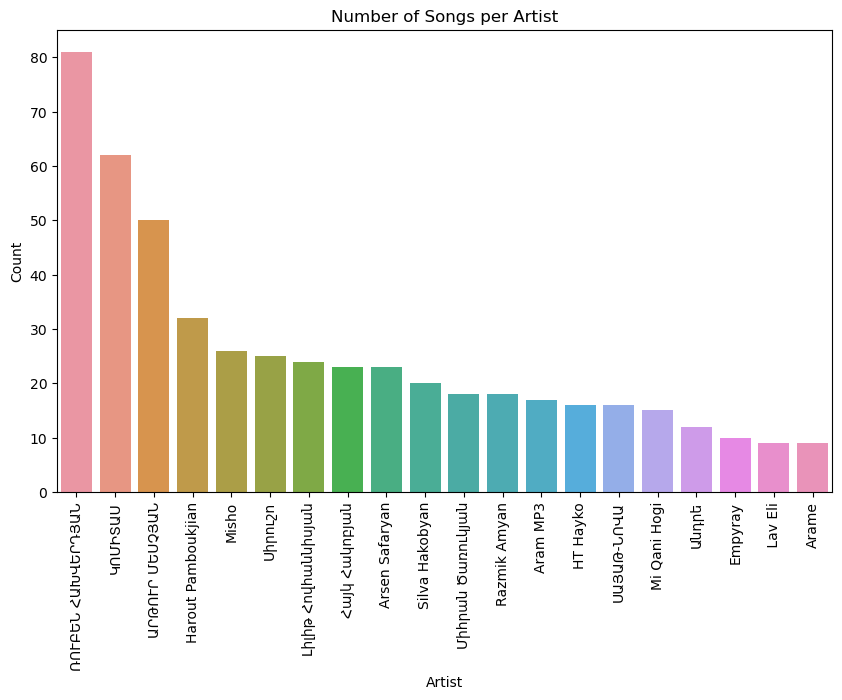

In [210]:
artist_counts = df['Artist'].value_counts()
# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(artist_counts.index, artist_counts)
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Number of Songs per Artist')
plt.xticks(rotation=90)
plt.show()

In [222]:
song_count_df = df.groupby('Artist')[['Song']].count()
fig = px.histogram(song_count_df, x='Song', title='Songs per artist', labels={'Song': 'Songs'})
fig.show()

In [212]:
# words per song
fig = px.histogram(df, x='n_stems_en', title='Words per song')
fig.show()

In [213]:
from plotly.subplots import make_subplots

# Create two subplots
fig = make_subplots(rows=1, cols=2)

# Plot for n_tokens_en
fig.add_trace(
    go.Histogram(x=df['n_stems_en'], nbinsx=20, name='English'),
    row=1, col=1
)

# Plot for n_tokens_hy
fig.add_trace(
    go.Histogram(x=df['n_tokens_hy'], nbinsx=20, name='Armenian'),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title='Words per Song',
    xaxis=dict(title='Number of Words'),
    yaxis=dict(title='Count'),
    barmode='overlay'
)

# Show the plot
fig.show()


In [214]:
fig = px.box(df, x='Artist', y='n_tokens_hy', title='Word count(hy) per song by artist')
fig.show()

Next I check the ratio of unique words over all words. This ratio is 1 if all words of a song are different, the more repeated words appearing in a song the lower this ratio becomes.

In [215]:
df['n_unique_stems_en'] = df['stems_en'].map(lambda lst: len(set(lst)))

df['unique_stems_ratio_en'] = df['n_unique_stems_en'] / df['n_stems_en']

df['n_unique_tokens_hy'] = df['tokens_hy'].map(lambda lst: len(set(lst)))

df['unique_tokens_ratio_hy'] = df['n_unique_tokens_hy'] / df['n_tokens_hy']

In [216]:
# words per song
fig = px.histogram(df, x='n_unique_stems_en', title='Unique words per song')
fig.show()

In [217]:
fig = px.box(df, x='Artist', y='unique_stems_ratio_en', title='Ratio of unique words to all words')
fig.show()

In [218]:
fig = px.box(df, x='Artist', y='unique_tokens_ratio_hy', title='Ratio of unique words to all words(hy)')
fig.show()

Adding sentiment of each song as new feature.
The TextBlob library is used to calculate the sentiment polarity of each song's translated lyrics. The sentiment polarity ranges from -1 to 1, where values closer to 1 indicate a positive sentiment and values closer to -1 indicate a negative sentiment.

In [219]:
df['sentiment'] = df['Translated_Lyrics'].apply(lambda text: TextBlob(text).sentiment.polarity)
print(df[['Song','sentiment']])

                       Song  sentiment
0               ԱՀԱ ԵՎ ՎԵՐՋ  -0.193333
1                 ԱՄԵՆԸ ՁԵԶ   0.258333
2    ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ  -0.012500
3             ԱՇԽԱՐՀԻ ՑԱՎՈՎ   0.060173
4                ԱՌԱՋ ԳԻՏԵԻ   0.118182
..                      ...        ...
537                Chanapar  -0.016875
538                Es Pahin   0.133333
539                   Rhyme   0.060014
541           Yes Qo Nmanei  -0.187500
542             Lav Jamanak   0.306000

[506 rows x 2 columns]


In [220]:
fig = px.box(df, x='Artist', y='sentiment', title='Sentiment by artist')
fig.show()

Now our dataset is ready for models.

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 542
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Artist                  506 non-null    object 
 1   Song                    506 non-null    object 
 2   Lyrics                  506 non-null    object 
 3   Translated_Lyrics       506 non-null    object 
 4   lines                   506 non-null    int64  
 5   tokens_hy               506 non-null    object 
 6   tokens_en               506 non-null    object 
 7   stems_en                506 non-null    object 
 8   n_stems_en              506 non-null    int64  
 9   n_tokens_hy             506 non-null    int64  
 10  stems_en_str            506 non-null    object 
 11  tf_idf_vector           506 non-null    object 
 12  tf_idf_score            506 non-null    float64
 13  n_unique_stems_en       506 non-null    int64  
 14  unique_stems_ratio_en   506 non-null    fl

<a name="models"></a>

# Best Model

In [224]:
# Load the saved model from file
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [225]:
import pandas as pd
from langdetect import detect_langs

from translate import Translator

def translate_lyrics_list(lines):
    translator = Translator(from_lang='hy', to_lang='en')
    translated_lines = []

    for line in lines:
        translated_line = translator.translate(line)
        translated_lines.append(translated_line)

    return translated_lines

def preprocess_lyrics_list(lines):
    # Lowercase the lyric lines
    lines_lower = [line.lower() for line in lines]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    lines_filtered = [' '.join([word for word in nltk.word_tokenize(line) if word not in stop_words]) for line in lines_lower]

    return lines_filtered



# Defining a function which converts words into numeric vectors for prediction
def FunctionPredictArtist(inpText):
    
    inpText = translate_lyrics_list(inpText)
    print(translate_lyrics_list(inpText))
    #inpText = preprocess_lyrics_list(inpText)
    #print(translation)
    # Generating the Glove word vector embeddings
    X=FunctionText2Vec(inpText)
    #print(X)
    
    # If standardization/normalization was done on training
    # then the above X must also be converted to same platform
    # Generating the normalized values of X
    X=PredictorScalerFit.transform(X)
    
    # Generating the prediction using Naive Bayes model and returning
    Prediction=loaded_model.predict(X)
    Result=pd.DataFrame(data=inpText, columns=['Translated_Lyrics'])
    Result['Prediction']=Prediction
    return(Result)

In [226]:
example=["Մարդիկ ասում են որ մենակությունից վատ բան չկա էս կյանքում Երբ որ մարդ իրան մենակա զգում Բայց իմ կարծիքով մենակ լնելը ու զգալը Պետչի շփոթել էտի լրիվ տարբեր բաներ են", 
         "Որտև մարդ կա ընգեր չունի կնիկ չունի",
         "Ուրիշների կարծիքով ինքը խեղճա ինքը մեղկա Բայց էտ մարդը իրան լավա զգում իրան տենց դզումա",
         "Լավագույն տղերքը հեռանում են Օտար ափերում բախտ որոնում" ,"Սիրելի կանայք թողնում գնում են Ուրիշների մեջ են մեզ փնտրում",
         "Սովորելով մեկա անգրագետ են մնում Դե բա էտ են կոչում ինքնաճանաչում Ինքնասիրություննա ձեր վրա հաչում չեք է ամաչում Ձեր տնգած բույսը փդում չի էլ կանաչում Ովա ձեզ պաչում պուտանկից բացի գնա քեզ հեքիաթնա կանչում Օրինակ ինձ ցույց տու բնօրինակդ ակնհայտա դու հորինած ես"]

In [227]:
print(example[0])

Մարդիկ ասում են որ մենակությունից վատ բան չկա էս կյանքում Երբ որ մարդ իրան մենակա զգում Բայց իմ կարծիքով մենակ լնելը ու զգալը Պետչի շփոթել էտի լրիվ տարբեր բաներ են


In [228]:
FunctionPredictArtist(example)

['People say that there is nothing wrong with my life when I feel alone, but in my opinion, being alone and feeling alone are completely different things.', "Where there's a man, there's a mage, there's a seal.", "Some people think it's a bad idea, but some people think it's a good idea to feel bad about themselves.", 'The best way to get away from the bad guys is to go on a cruise.', "We're looking for women who are willing to let go of us.", "Learn to be an uneducated person Well, they call you self-awareness Self-awareness doesn't bark at you Don't be ashamed of the plant you planted Doesn't sprout green Don't bark at anyone other than a pout Go to a fairy tale call to yourself For example, show me the original you obviously invented"]


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\User\AppData\Local\Temp\ipykernel_12912\3706690410.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\AppData\Local\Temp\ipykernel_12912\3706690410.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\AppData\Local\Temp\ipykernel_12912\3706690410.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\AppData\Local\Temp\ipykernel_12912\3706690410.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from panda

,Translated_Lyrics,Prediction
0,People say that there is nothing wrong with my...,ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
1,"Where there's a man, there's a mage, there's a...",ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ
2,"Some people think it's a bad idea, but some pe...",Misho
3,The best way to get away from the bad guys is ...,Misho
4,We're looking for women who are willing to let...,Misho
5,"Learn to be an uneducated person Well, they ca...",HT Hayko
